This is a DataQuest project about sampling. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Investigating Fandango Movie Ratings
In 2015, Walt Hickey pointed out that the movie ratings on the Fandango page were biased and incorrect. He found that the discrepancy stems from rounding up ratings to the nearest half-star or sometimes even to the nearest whole star. Fandango's officials claimed that they repaired the bug causing the rounding issue. In this project, I will analyse more recent ratings data in order to see whether the issue has indeed been solved.

I will compare two data sets: the data set used by Walt Hickey, which will be called `Hickey` and a newer data set from 2016 and 2017, which will be referred to as `new_data`. Both data sets are available on Github:
<a href ="https://github.com/fivethirtyeight/data/tree/master/fandango">Hickey<a/>
and 
<a href = "https://github.com/mircealex/Movie_ratings_2016_17">new data<a/>

In [2]:
Hickey = pd.read_csv('fandango_score_comparison.csv')
new_data = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
Hickey.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
new_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
Hickey.isnull().sum()

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Fandango_Stars                0
Fandango_Ratingvalue          0
RT_norm                       0
RT_user_norm                  0
Metacritic_norm               0
Metacritic_user_nom           0
IMDB_norm                     0
RT_norm_round                 0
RT_user_norm_round            0
Metacritic_norm_round         0
Metacritic_user_norm_round    0
IMDB_norm_round               0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
Fandango_votes                0
Fandango_Difference           0
dtype: int64

In [6]:
new_data.isnull().sum()

movie           0
year            0
metascore       0
imdb            0
tmeter          0
audience        0
fandango        0
n_metascore     0
n_imdb          0
n_tmeter        0
n_audience      0
nr_metascore    0
nr_imdb         0
nr_tmeter       0
nr_audience     0
dtype: int64

In [7]:
Hickey.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [8]:
new_data.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


From the first glimpse I see that the 2016/2017 data set `new_data` is significantly bigger than the data set `Hickey`. Next I will isolate the columns I will need:

In [9]:
Hickey_part = Hickey[['FILM', 
                      'Fandango_Stars', 
                      'Fandango_Ratingvalue', 
                      'Fandango_votes', 
                      'Fandango_Difference'
                     ]].copy()
new_data_part = new_data[['movie', 
                          'year', 
                          'fandango'
                         ]].copy()

My aim is to determine whether the rating system has changed after Hickey's analysis. Therefore, I would like to compare sampled data from before with data after Hickey's analysis was published. The data provided is already sampled but I still will need to test whether the samples are representative in order to avoid large sampling errors.

The `read_me` files and Hickey's artikle (<a href = "https://fivethirtyeight.com/features/fandango-movies-ratings/">Hickey's article</a>,
<a href = "https://github.com/fivethirtyeight/data/blob/master/fandango/README.md">Hickey read_me</a>, <a href = "https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md">new data read_me</a>) give in insight into the sampling methods.

The criteria for Hickey's sampling are: "[the file] contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015." and the movie must have had tickets on sale in 2015.

The new data has been sampled in the following way: "[the file] contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017."

Both samples are not random. The filtering for movies with a certain number of ratings will make the sample subject to temporal trends. Therefore, I wouldn't think that both samples are representative of the entire population.

### Change of goal
In the light of the previous conclusion that the data sets are not representatives of the population, I will change my goal. The two data sets are sampled such that it contains only relatively popular movies. Hence, I will change my goal to whether the ratings system of popular movies has changed after Hickey's analysis was published. I will compare two years: 2015 and 2016 as this is the year before and after, respectively, Hickey published his analsysis.

I define popular according to the definition from Hickey's analysis: a movie is popular if it has 30 fanratings or more on Fandango's website.

Obviously, 100% of the movies in `Hickey_part` have over 30 fan ratings as this was one of the criteria for this data set. The other data set, `new_data_part` doesn't contain any information about how many ratings were given. I will set up a random sample and check online how many ratings the movies from the random sample have.

In [10]:
Hickey_part[Hickey_part['Fandango_votes']>30].shape[0]/Hickey_part.shape[0]

1.0

In [11]:
new_data_part.sample(10, random_state = 0)

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


It seems that Fandango has slightly changed the ratings and has accustomed to use the measurements from Rotten Tomatoes. However, the data that I am using was created before the change. From what I can see on the website, all movies seem to have more than 30 ratings. However, the data set `new_data` was created a few years ago and I don't know how many ratings each movie had at the time. From the DataQuest guidance on this project, I could find that the data set `new_data` can be considered representative of popular movies of 2016.

Next, I filter all movies for 2015 and 2016 in the data sets `Hickey_part` and `new_data_part`, respectively. It seems there is no column "year" in `Hickey_part`, thus the year must be extracted from the title:

In [12]:
Hickey_part['year'] = Hickey_part['FILM'].str[-5:-1]
Hickey_2015 = Hickey_part[Hickey_part['year'] == '2015'].copy()
Hickey_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [13]:
new_data_2016 = new_data_part[new_data_part['year'] == 2016].copy()
new_data_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing the ratings distribution for 2015 and 2016

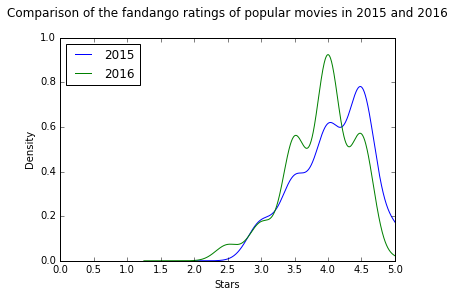

In [14]:
Hickey_2015['Fandango_Stars'].plot.kde(label = '2015')
new_data_2016['fandango'].plot.kde(label = '2016')
plt.legend()
plt.title('Comparison of the fandango ratings of popular movies in 2015 and 2016', y = 1.07)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Both distributions are left skewed. However, we can see that the distribution of movies from 2016 is not as extremely left skewed as the distribution of movies from 2015.

In general, the 2016 distribution is over all lower than the 2015 distribution. This indicates that the rating system has changed from 2015 to 2016.

## Comparison of frequency distribution
To underline the kernel density plots above, I will put the plot into numbers and compare the frequency distributions:

In [15]:
Hickey_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
new_data_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The difference between the distribution that we saw in the kernel density plot are clearly recognisable in the frequency distributions: The 2015 data set peaks at 4.5 stars and is gradually ascending to the peak and abruptly decreases after the peak. The distribution of 2016, however, resembles more a normal distribution than the 2015 distribution. It has a peak at 4.0 stars and drops slighly faster with increasing stars than decreasing stars. Furthermore, the range of the distribution of 2016 increased by half a star.

## Some more statistics to determine the direction of change

Next I will compute some statistics such as mean, median, and mode of both distributions to gain some further insights:

In [20]:
mean_2015 = Hickey_2015['Fandango_Stars'].mean()
mean_2016 = new_data_2016['fandango'].mean()

median_2015 = Hickey_2015['Fandango_Stars'].median()
median_2016 = new_data_2016['fandango'].median()

mode_2015 = Hickey_2015['Fandango_Stars'].mode()[0]
mode_2016 = new_data_2016['fandango'].mode()[0]

In [21]:
stats_df = pd.DataFrame(data = {'2015':[mean_2015, median_2015, mode_2015],'2016':[mean_2016, median_2016, mode_2016]}, index = ['mean','median','mode'])
stats_df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


The mean, median, and mode reflect the shape of the distribution. In 2016 all three values are close to each other, which mirrors it's nearly normal distribution. In 2015, median and mean < mode, which is common in skewed distributions.

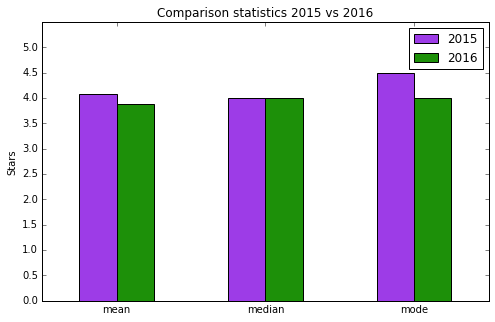

In [34]:

stats_df.plot.bar(color = ['#9d3ce7','#1d9009'], figsize = (8,5))

plt.title('Comparison statistics 2015 vs 2016')
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.yticks(np.arange(0,5.5,.5))
plt.xticks(rotation = 0)
plt.show()

## Conclusion

I showed that the distribution of stars does change from 2015 to 2016. One can see that the distribution of stars, albeit being still strongly left skewed, has changed more towards a normal distribution in 2016 than in 2015. These results give a hingt that fandango indeed fixed (at least to an extent) the bias in its algorithm.